In [1]:
import tensorflow as tf
from keras import models , layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"MyData", shuffle = True, image_size = (IMAGE_SIZE,IMAGE_SIZE), batch_size = BATCH_SIZE)
class_name = dataset.class_names

Found 2152 files belonging to 3 classes.


2024-04-16 17:29:31.085771: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-16 17:29:31.085794: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-16 17:29:31.085801: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-16 17:29:31.085828: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-16 17:29:31.085843: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


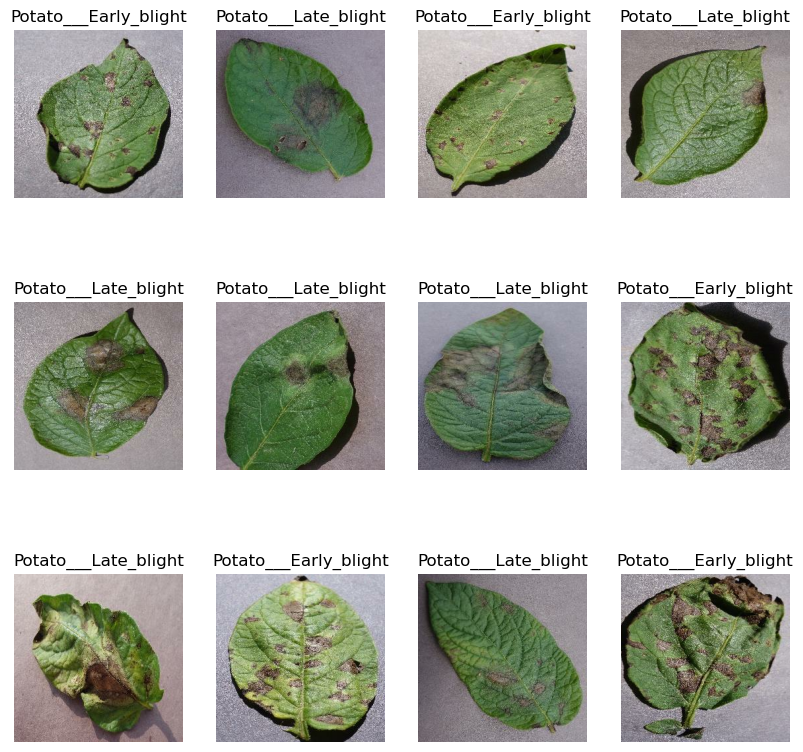

In [4]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [5]:
def split_dataset(dataset,train_split=0.8,val_split=0.1,test_split=0.1,suffle = True, suffle_size = 10000):
    ds_size = len(dataset)
    if suffle:
      dataset=dataset.shuffle(suffle_size,seed = 12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = dataset.take(train_size)
    validation_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds,validation_ds,test_ds

In [6]:
train_ds , validation_ds ,test_ds = split_dataset(dataset)

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
Validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [8]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [10]:
shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale, data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=shape)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [12]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=Validation_ds
    )

Epoch 1/10


2024-04-16 17:29:32.866718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-16 17:29:33.707691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:34.030965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 5:38 - loss: 1.1364 - accuracy: 0.1250

2024-04-16 17:29:38.873754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:38.874792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 13s - loss: 1.1184 - accuracy: 0.2344 

2024-04-16 17:29:39.118135: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:39.118614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 11s - loss: 1.0853 - accuracy: 0.2917

2024-04-16 17:29:39.326425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:39.326948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 11s - loss: 1.0406 - accuracy: 0.3203

2024-04-16 17:29:39.535695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:39.535745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 1.0082 - accuracy: 0.3688

2024-04-16 17:29:39.748273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:39.748492: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.9708 - accuracy: 0.4062

2024-04-16 17:29:39.962728: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:39.963072: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 1.0293 - accuracy: 0.4107

2024-04-16 17:29:40.174302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:40.174859: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 10s - loss: 1.0172 - accuracy: 0.4141

2024-04-16 17:29:40.423396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:40.423869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 10s - loss: 1.0134 - accuracy: 0.4236

2024-04-16 17:29:40.654841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:40.657995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 1.0078 - accuracy: 0.4313 

2024-04-16 17:29:40.877347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:40.877505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 1.0085 - accuracy: 0.4318

2024-04-16 17:29:41.085775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:41.086391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 1.0035 - accuracy: 0.4427

2024-04-16 17:29:41.297880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:41.298041: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 9s - loss: 0.9985 - accuracy: 0.4471

2024-04-16 17:29:41.530948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:41.532095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.9980 - accuracy: 0.4531

2024-04-16 17:29:41.773306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:41.773676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.9997 - accuracy: 0.4458

2024-04-16 17:29:42.022988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:42.023100: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 1.0000 - accuracy: 0.4453

2024-04-16 17:29:42.240808: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:42.241509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.9990 - accuracy: 0.4467

2024-04-16 17:29:42.454012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:42.454155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 8s - loss: 1.0013 - accuracy: 0.4410

2024-04-16 17:29:42.677305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:42.679549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 1.0013 - accuracy: 0.4408

2024-04-16 17:29:42.913562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:42.914112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 1.0000 - accuracy: 0.4594

2024-04-16 17:29:43.119949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:43.120202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.9973 - accuracy: 0.4792

2024-04-16 17:29:43.340201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:43.340659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.9962 - accuracy: 0.4773

2024-04-16 17:29:43.557106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:43.557535: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.9932 - accuracy: 0.4769

2024-04-16 17:29:43.770472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:43.770810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.9906 - accuracy: 0.4779

2024-04-16 17:29:43.983431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:43.983751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.9848 - accuracy: 0.4775

2024-04-16 17:29:44.196245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:44.196490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.9841 - accuracy: 0.4700

2024-04-16 17:29:44.412152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:44.413382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.9789 - accuracy: 0.4734

2024-04-16 17:29:44.627744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:44.629029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.9719 - accuracy: 0.4743

2024-04-16 17:29:44.842740: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:44.843590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.9692 - accuracy: 0.4709

2024-04-16 17:29:45.080034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:45.080321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.9709 - accuracy: 0.4688

2024-04-16 17:29:45.291586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:45.291837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.9652 - accuracy: 0.4728

2024-04-16 17:29:45.500781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:45.501146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.9663 - accuracy: 0.4766

2024-04-16 17:29:45.709372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:45.709643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.9648 - accuracy: 0.4725

2024-04-16 17:29:45.921715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:45.922027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.9619 - accuracy: 0.4789

2024-04-16 17:29:46.141691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:46.141981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.9595 - accuracy: 0.4857

2024-04-16 17:29:46.358616: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:46.359477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.9570 - accuracy: 0.4870

2024-04-16 17:29:46.579679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:46.580224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.9552 - accuracy: 0.4865

2024-04-16 17:29:46.813898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:46.814135: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.9540 - accuracy: 0.4901

2024-04-16 17:29:47.055963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:47.056434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.9523 - accuracy: 0.4904

2024-04-16 17:29:47.292001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:47.292143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.9510 - accuracy: 0.4945

2024-04-16 17:29:47.516040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:47.516252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.9487 - accuracy: 0.4970

2024-04-16 17:29:47.722131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:47.722407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.9449 - accuracy: 0.5000

2024-04-16 17:29:47.930117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:47.930503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.9429 - accuracy: 0.4993

2024-04-16 17:29:48.148872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:48.149101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.9416 - accuracy: 0.4979

2024-04-16 17:29:48.408823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:48.408920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 2s - loss: 0.9400 - accuracy: 0.4951

2024-04-16 17:29:48.681815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:48.682221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.9357 - accuracy: 0.5000

2024-04-16 17:29:48.931229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:48.931530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.9354 - accuracy: 0.4973

2024-04-16 17:29:49.144004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:49.144054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.9321 - accuracy: 0.4974

2024-04-16 17:29:49.353155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:49.353981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.9306 - accuracy: 0.4968

2024-04-16 17:29:49.564819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:49.565256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.9309 - accuracy: 0.4969

2024-04-16 17:29:49.786523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:49.787240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.9279 - accuracy: 0.5018

2024-04-16 17:29:49.992181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:49.992339: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.9302 - accuracy: 0.5066

2024-04-16 17:29:50.207729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:50.208378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.9270 - accuracy: 0.5094

2024-04-16 17:29:50.422066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:50.422342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - ETA: 0s - loss: 0.9247 - accuracy: 0.5139

2024-04-16 17:29:50.791759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 20s 257ms/step - loss: 0.9247 - accuracy: 0.5139 - val_loss: 0.8996 - val_accuracy: 0.5573
Epoch 2/10


2024-04-16 17:29:52.470011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:52.472789: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 14s - loss: 0.9185 - accuracy: 0.5938

2024-04-16 17:29:52.733043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:52.733194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 14s - loss: 0.9075 - accuracy: 0.5938

2024-04-16 17:29:53.006697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:53.006926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 12s - loss: 0.8828 - accuracy: 0.6667

2024-04-16 17:29:53.217748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:53.217995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 11s - loss: 0.8733 - accuracy: 0.6250

2024-04-16 17:29:53.424217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:53.424454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 11s - loss: 0.8823 - accuracy: 0.5875

2024-04-16 17:29:53.688372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:53.688698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 11s - loss: 0.8622 - accuracy: 0.5833

2024-04-16 17:29:53.897798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:53.897920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 11s - loss: 0.8550 - accuracy: 0.5938

2024-04-16 17:29:54.166434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:54.166498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 11s - loss: 0.8595 - accuracy: 0.5781

2024-04-16 17:29:54.456106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:54.456264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 10s - loss: 0.8736 - accuracy: 0.5833

2024-04-16 17:29:54.684384: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:54.684517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 10s - loss: 0.8738 - accuracy: 0.5875

2024-04-16 17:29:54.894273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:54.894669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 10s - loss: 0.8755 - accuracy: 0.5852

2024-04-16 17:29:55.174407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:55.174514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 10s - loss: 0.8706 - accuracy: 0.5938

2024-04-16 17:29:55.388447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:55.388824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 10s - loss: 0.8594 - accuracy: 0.5962

2024-04-16 17:29:55.731848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:55.732351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 9s - loss: 0.8544 - accuracy: 0.5938 

2024-04-16 17:29:55.946312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:55.946321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 9s - loss: 0.8460 - accuracy: 0.6042

2024-04-16 17:29:56.163023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:56.163548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 9s - loss: 0.8381 - accuracy: 0.6191

2024-04-16 17:29:56.380210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:56.381361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.8235 - accuracy: 0.6305

2024-04-16 17:29:56.592679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:56.592686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 8s - loss: 0.8147 - accuracy: 0.6424

2024-04-16 17:29:56.812938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:56.813658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 8s - loss: 0.7983 - accuracy: 0.6480

2024-04-16 17:29:57.085852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:57.086226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 8s - loss: 0.7949 - accuracy: 0.6562

2024-04-16 17:29:57.316327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:57.316605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.8100 - accuracy: 0.6503

2024-04-16 17:29:57.529159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:57.529571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.8061 - accuracy: 0.6491

2024-04-16 17:29:57.747873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:57.749465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 7s - loss: 0.8056 - accuracy: 0.6481

2024-04-16 17:29:57.968240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:57.968512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 7s - loss: 0.8223 - accuracy: 0.6458

2024-04-16 17:29:58.236837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:58.238131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.8157 - accuracy: 0.6475

2024-04-16 17:29:58.506859: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:58.507023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.8058 - accuracy: 0.6538

2024-04-16 17:29:58.717735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:58.718039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 6s - loss: 0.8042 - accuracy: 0.6551

2024-04-16 17:29:58.938433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:58.938741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 6s - loss: 0.8090 - accuracy: 0.6529

2024-04-16 17:29:59.151981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:59.152244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.8081 - accuracy: 0.6541

2024-04-16 17:29:59.419488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:59.419767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.8128 - accuracy: 0.6479

2024-04-16 17:29:59.676865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:59.677290: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.8121 - accuracy: 0.6462

2024-04-16 17:29:59.892112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:29:59.892743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 5s - loss: 0.8117 - accuracy: 0.6455

2024-04-16 17:30:00.104665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:00.104880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 5s - loss: 0.8050 - accuracy: 0.6515

2024-04-16 17:30:00.377027: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:00.377348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.7985 - accuracy: 0.6590

2024-04-16 17:30:00.587798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:00.588168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.7969 - accuracy: 0.6571

2024-04-16 17:30:00.855432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:00.855430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 4s - loss: 0.7907 - accuracy: 0.6615

2024-04-16 17:30:01.063446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:01.063655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 4s - loss: 0.7921 - accuracy: 0.6571

2024-04-16 17:30:01.275740: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:01.276067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.7957 - accuracy: 0.6554

2024-04-16 17:30:01.545426: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:01.545547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.7911 - accuracy: 0.6595

2024-04-16 17:30:01.776379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:01.776544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.7878 - accuracy: 0.6609

2024-04-16 17:30:01.989329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:01.989761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 3s - loss: 0.7834 - accuracy: 0.6616

2024-04-16 17:30:02.198801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:02.198995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.7802 - accuracy: 0.6667

2024-04-16 17:30:02.416840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:02.419021: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.7815 - accuracy: 0.6672

2024-04-16 17:30:02.632763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:02.633298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.7749 - accuracy: 0.6712

2024-04-16 17:30:02.850402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:02.850454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 2s - loss: 0.7723 - accuracy: 0.6715

2024-04-16 17:30:03.109684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:03.109863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.7680 - accuracy: 0.6746

2024-04-16 17:30:03.322103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:03.322602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.7667 - accuracy: 0.6749

2024-04-16 17:30:03.535920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:03.536536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.7662 - accuracy: 0.6758

2024-04-16 17:30:03.749880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:03.751562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.7638 - accuracy: 0.6767

2024-04-16 17:30:03.980795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:03.981226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.7588 - accuracy: 0.6775

2024-04-16 17:30:04.197061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:04.197928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.7543 - accuracy: 0.6789

2024-04-16 17:30:04.419404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:04.419838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.7500 - accuracy: 0.6809

2024-04-16 17:30:04.632828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:04.633263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.7452 - accuracy: 0.6834

2024-04-16 17:30:04.848515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:04.849363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 13s 239ms/step - loss: 0.7434 - accuracy: 0.6834 - val_loss: 0.5985 - val_accuracy: 0.7083
Epoch 3/10
 1/54 [..............................] - ETA: 10s - loss: 0.3795 - accuracy: 0.8438

2024-04-16 17:30:05.393682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:05.394152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:05.593094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:05.593668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.4589 - accuracy: 0.8125

2024-04-16 17:30:05.802394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:05.802635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 10s - loss: 0.5595 - accuracy: 0.7292

2024-04-16 17:30:06.014514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:06.015069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.5826 - accuracy: 0.7266

2024-04-16 17:30:06.228852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:06.229452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.5502 - accuracy: 0.7437

2024-04-16 17:30:06.461761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:06.461929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.6010 - accuracy: 0.7292

2024-04-16 17:30:06.673696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:06.673757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.5755 - accuracy: 0.7411

2024-04-16 17:30:06.886154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:06.886155: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 9s - loss: 0.5726 - accuracy: 0.7461 

2024-04-16 17:30:07.098369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:07.099103: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.5699 - accuracy: 0.7465

2024-04-16 17:30:07.310683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:07.310823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.5693 - accuracy: 0.7531

2024-04-16 17:30:07.522000: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:07.522649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.5639 - accuracy: 0.7557

2024-04-16 17:30:07.733714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:07.734243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 8s - loss: 0.5589 - accuracy: 0.7604

2024-04-16 17:30:07.942365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:07.942891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 8s - loss: 0.5475 - accuracy: 0.7692

2024-04-16 17:30:08.148254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:08.148268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.5405 - accuracy: 0.7768

2024-04-16 17:30:08.407053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:08.407259: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.5530 - accuracy: 0.7688

2024-04-16 17:30:08.646573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:08.647581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.5591 - accuracy: 0.7637

2024-04-16 17:30:08.889690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:08.889925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.5528 - accuracy: 0.7665

2024-04-16 17:30:09.102468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:09.103360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.5614 - accuracy: 0.7604

2024-04-16 17:30:09.324051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:09.324444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.5557 - accuracy: 0.7615

2024-04-16 17:30:09.535209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:09.535579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.5635 - accuracy: 0.7578

2024-04-16 17:30:09.752945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:09.753525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.5707 - accuracy: 0.7545

2024-04-16 17:30:09.968540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:09.969469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 6s - loss: 0.5666 - accuracy: 0.7585

2024-04-16 17:30:10.182025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:10.182343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.5624 - accuracy: 0.7622

2024-04-16 17:30:10.401144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:10.401573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.5549 - accuracy: 0.7656

2024-04-16 17:30:10.614396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:10.614584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.5597 - accuracy: 0.7625

2024-04-16 17:30:10.846264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:10.846484: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.5532 - accuracy: 0.7668

2024-04-16 17:30:11.055823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:11.056025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.5465 - accuracy: 0.7708

2024-04-16 17:30:11.269275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:11.269587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.5453 - accuracy: 0.7712

2024-04-16 17:30:11.483207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:11.483602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.5382 - accuracy: 0.7737

2024-04-16 17:30:11.710278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:11.711143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.5324 - accuracy: 0.7760

2024-04-16 17:30:11.926687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:11.927327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.5246 - accuracy: 0.7792

2024-04-16 17:30:12.146842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:12.147033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.5220 - accuracy: 0.7783

2024-04-16 17:30:12.364234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:12.364960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.5203 - accuracy: 0.7794

2024-04-16 17:30:12.581585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:12.582516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.5257 - accuracy: 0.7785

2024-04-16 17:30:12.820409: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:12.820719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.5230 - accuracy: 0.7786

2024-04-16 17:30:13.031360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:13.032282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.5257 - accuracy: 0.7769

2024-04-16 17:30:13.251672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:13.252371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.5263 - accuracy: 0.7753

2024-04-16 17:30:13.469496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:13.469805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.5222 - accuracy: 0.7788

2024-04-16 17:30:13.930376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:13.930549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.5227 - accuracy: 0.7804

2024-04-16 17:30:14.142710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:14.143126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.5197 - accuracy: 0.7797

2024-04-16 17:30:14.363909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:14.363922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.5214 - accuracy: 0.7797

2024-04-16 17:30:14.581566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:14.582751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.5167 - accuracy: 0.7812

2024-04-16 17:30:14.798897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:14.799943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.5150 - accuracy: 0.7820

2024-04-16 17:30:15.035217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:15.035387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.5098 - accuracy: 0.7848

2024-04-16 17:30:15.254506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:15.255424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 2s - loss: 0.5154 - accuracy: 0.7826

2024-04-16 17:30:15.469459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:15.469893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.5154 - accuracy: 0.7833

2024-04-16 17:30:15.683100: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:15.683343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.5105 - accuracy: 0.7852

2024-04-16 17:30:15.899268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:15.899859: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.5100 - accuracy: 0.7858

2024-04-16 17:30:16.121083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:16.121114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.5089 - accuracy: 0.7857

2024-04-16 17:30:16.334545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:16.335007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.5069 - accuracy: 0.7881

2024-04-16 17:30:16.552151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:16.552900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.5032 - accuracy: 0.7904

2024-04-16 17:30:16.774705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:16.774896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.5015 - accuracy: 0.7915

2024-04-16 17:30:17.013231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:17.013701: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.5004 - accuracy: 0.7919

2024-04-16 17:30:17.230199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:17.230635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 230ms/step - loss: 0.4968 - accuracy: 0.7946 - val_loss: 0.5088 - val_accuracy: 0.7917
Epoch 4/10


2024-04-16 17:30:17.782759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:17.782761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 10s - loss: 0.5725 - accuracy: 0.8125

2024-04-16 17:30:17.988534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:17.989032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 11s - loss: 0.4803 - accuracy: 0.8438

2024-04-16 17:30:18.204036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:18.204527: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 10s - loss: 0.4432 - accuracy: 0.8438

2024-04-16 17:30:18.415447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:18.416147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.4148 - accuracy: 0.8516

2024-04-16 17:30:18.628761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:18.629097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.4259 - accuracy: 0.8438

2024-04-16 17:30:18.845705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:18.851076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.4176 - accuracy: 0.8490

2024-04-16 17:30:19.060572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:19.061548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.4662 - accuracy: 0.8393

2024-04-16 17:30:19.295117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:19.295313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 9s - loss: 0.4589 - accuracy: 0.8359 

2024-04-16 17:30:19.509718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:19.510192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.4948 - accuracy: 0.8194

2024-04-16 17:30:19.734834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:19.736207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.4951 - accuracy: 0.8219

2024-04-16 17:30:19.944925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:19.945421: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.4820 - accuracy: 0.8210

2024-04-16 17:30:20.157277: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:20.157795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.4632 - accuracy: 0.8255

2024-04-16 17:30:20.370302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:20.370840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 8s - loss: 0.4856 - accuracy: 0.8125

2024-04-16 17:30:20.588805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:20.589629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.4794 - accuracy: 0.8125

2024-04-16 17:30:20.802568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:20.802870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.4667 - accuracy: 0.8188

2024-04-16 17:30:21.015526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:21.016088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.4585 - accuracy: 0.8223

2024-04-16 17:30:21.251934: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:21.251987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.4576 - accuracy: 0.8199

2024-04-16 17:30:21.488180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:21.488497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.4494 - accuracy: 0.8229

2024-04-16 17:30:21.714453: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:21.714876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.4453 - accuracy: 0.8224

2024-04-16 17:30:21.930362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:21.930394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.4405 - accuracy: 0.8266

2024-04-16 17:30:22.162877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:22.163213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.4322 - accuracy: 0.8289

2024-04-16 17:30:22.381785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:22.381862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.4278 - accuracy: 0.8295

2024-04-16 17:30:22.604440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:22.604727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.4328 - accuracy: 0.8247

2024-04-16 17:30:22.845700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:22.845945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.4380 - accuracy: 0.8203

2024-04-16 17:30:23.079488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:23.079504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.4312 - accuracy: 0.8238

2024-04-16 17:30:23.298778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:23.299240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.4225 - accuracy: 0.8293

2024-04-16 17:30:23.523354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:23.523653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.4193 - accuracy: 0.8310

2024-04-16 17:30:23.745902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:23.746051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.4133 - accuracy: 0.8315

2024-04-16 17:30:23.976640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:23.976755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.4093 - accuracy: 0.8330

2024-04-16 17:30:24.190846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:24.191150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.4037 - accuracy: 0.8354

2024-04-16 17:30:24.416406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:24.416474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.3984 - accuracy: 0.8377

2024-04-16 17:30:24.643978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:24.644575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.3978 - accuracy: 0.8389

2024-04-16 17:30:24.866627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:24.866862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.3949 - accuracy: 0.8381

2024-04-16 17:30:25.081150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:25.081327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.3916 - accuracy: 0.8401

2024-04-16 17:30:25.303307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:25.303534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.3864 - accuracy: 0.8429

2024-04-16 17:30:25.519146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:25.519550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.3933 - accuracy: 0.8385

2024-04-16 17:30:25.734740: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:25.735101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.3883 - accuracy: 0.8412

2024-04-16 17:30:25.941833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:25.942755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.3868 - accuracy: 0.8421

2024-04-16 17:30:26.164410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:26.164780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.3862 - accuracy: 0.8438

2024-04-16 17:30:26.400299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:26.400542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.3806 - accuracy: 0.8469

2024-04-16 17:30:26.629472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:26.630342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.3772 - accuracy: 0.8476

2024-04-16 17:30:26.842904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:26.843164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.3767 - accuracy: 0.8467

2024-04-16 17:30:27.059175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:27.059427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.3758 - accuracy: 0.8488

2024-04-16 17:30:27.283276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:27.283653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.3728 - accuracy: 0.8509

2024-04-16 17:30:27.495461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:27.495808: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.3707 - accuracy: 0.8507

2024-04-16 17:30:27.709881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:27.710278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.3801 - accuracy: 0.8478

2024-04-16 17:30:27.925197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:27.926051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.3816 - accuracy: 0.8477

2024-04-16 17:30:28.138551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:28.138880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.3843 - accuracy: 0.8464

2024-04-16 17:30:28.366007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:28.366341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.3839 - accuracy: 0.8469

2024-04-16 17:30:28.583162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:28.583228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.3837 - accuracy: 0.8462

2024-04-16 17:30:28.804042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:28.804221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.3818 - accuracy: 0.8468

2024-04-16 17:30:29.028247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:29.029025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.3817 - accuracy: 0.8462

2024-04-16 17:30:29.250113: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:29.250168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.3779 - accuracy: 0.8485

2024-04-16 17:30:29.495915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:29.496163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 227ms/step - loss: 0.3778 - accuracy: 0.8484 - val_loss: 0.3344 - val_accuracy: 0.8646
Epoch 5/10


2024-04-16 17:30:30.032034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:30.032222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 11s - loss: 0.4055 - accuracy: 0.8125

2024-04-16 17:30:30.243107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:30.244342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 12s - loss: 0.3659 - accuracy: 0.8438

2024-04-16 17:30:30.481245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:30.481403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 11s - loss: 0.3278 - accuracy: 0.8646

2024-04-16 17:30:30.703875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:30.704666: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 11s - loss: 0.3055 - accuracy: 0.8750

2024-04-16 17:30:30.936047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:30.936911: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 11s - loss: 0.3315 - accuracy: 0.8625

2024-04-16 17:30:31.165350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:31.168849: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.3172 - accuracy: 0.8646

2024-04-16 17:30:31.382379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:31.382818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.3489 - accuracy: 0.8571

2024-04-16 17:30:31.604650: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:31.604782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 10s - loss: 0.3388 - accuracy: 0.8555

2024-04-16 17:30:31.820721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:31.820974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 10s - loss: 0.3383 - accuracy: 0.8576

2024-04-16 17:30:32.059393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:32.059403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.3272 - accuracy: 0.8656 

2024-04-16 17:30:32.283002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:32.285203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.3272 - accuracy: 0.8665

2024-04-16 17:30:32.501383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:32.501599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.3360 - accuracy: 0.8620

2024-04-16 17:30:32.736805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:32.736970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 9s - loss: 0.3321 - accuracy: 0.8606

2024-04-16 17:30:32.967111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:32.967574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 9s - loss: 0.3320 - accuracy: 0.8594

2024-04-16 17:30:33.188884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:33.189133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.3277 - accuracy: 0.8625

2024-04-16 17:30:33.417503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:33.417511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.3206 - accuracy: 0.8672

2024-04-16 17:30:33.650178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:33.650338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.3174 - accuracy: 0.8713

2024-04-16 17:30:33.899763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:33.900145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 8s - loss: 0.3172 - accuracy: 0.8733

2024-04-16 17:30:34.120170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:34.120551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.3206 - accuracy: 0.8717

2024-04-16 17:30:34.348299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:34.348510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.3136 - accuracy: 0.8734

2024-04-16 17:30:34.579354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:34.579612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.3088 - accuracy: 0.8765

2024-04-16 17:30:34.794593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:34.795755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.3062 - accuracy: 0.8764

2024-04-16 17:30:35.024577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:35.024748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 7s - loss: 0.3027 - accuracy: 0.8764

2024-04-16 17:30:35.248156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:35.248401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.3043 - accuracy: 0.8763

2024-04-16 17:30:35.464304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:35.464838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.3048 - accuracy: 0.8763

2024-04-16 17:30:35.722243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:35.722708: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.3062 - accuracy: 0.8750

2024-04-16 17:30:35.941481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:35.941948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 6s - loss: 0.3016 - accuracy: 0.8762

2024-04-16 17:30:36.169627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:36.169853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.2998 - accuracy: 0.8783

2024-04-16 17:30:36.394519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:36.395322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.3023 - accuracy: 0.8761

2024-04-16 17:30:36.644348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:36.644648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.3000 - accuracy: 0.8781

2024-04-16 17:30:36.877767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:36.877928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.3015 - accuracy: 0.8780

2024-04-16 17:30:37.102776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:37.102979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 5s - loss: 0.2997 - accuracy: 0.8789

2024-04-16 17:30:37.328084: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:37.328114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.3030 - accuracy: 0.8778

2024-04-16 17:30:37.572426: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:37.572549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.3080 - accuracy: 0.8759

2024-04-16 17:30:37.804053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:37.804418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.3030 - accuracy: 0.8786

2024-04-16 17:30:38.056291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:38.056456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 4s - loss: 0.3016 - accuracy: 0.8793

2024-04-16 17:30:38.294050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:38.294284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.2990 - accuracy: 0.8809

2024-04-16 17:30:38.536770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:38.538107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.2958 - accuracy: 0.8816

2024-04-16 17:30:38.753469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:38.753822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.2922 - accuracy: 0.8830

2024-04-16 17:30:39.003481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:39.003727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.2873 - accuracy: 0.8859

2024-04-16 17:30:39.211861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:39.212441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.2884 - accuracy: 0.8864

2024-04-16 17:30:39.428504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:39.429021: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.2936 - accuracy: 0.8847

2024-04-16 17:30:39.643945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:39.644419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.2987 - accuracy: 0.8815

2024-04-16 17:30:39.874193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:39.874297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.2962 - accuracy: 0.8828

2024-04-16 17:30:40.105696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:40.106916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 2s - loss: 0.2943 - accuracy: 0.8833

2024-04-16 17:30:40.316311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:40.316620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.2952 - accuracy: 0.8818

2024-04-16 17:30:40.528147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:40.528511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.2956 - accuracy: 0.8823

2024-04-16 17:30:40.745203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:40.746111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.2939 - accuracy: 0.8835

2024-04-16 17:30:40.955073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:40.955507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.2961 - accuracy: 0.8827

2024-04-16 17:30:41.166538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:41.166978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.2970 - accuracy: 0.8831

2024-04-16 17:30:41.378569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:41.379039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.2997 - accuracy: 0.8824

2024-04-16 17:30:41.594775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:41.594850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.2995 - accuracy: 0.8828

2024-04-16 17:30:41.814088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:41.815315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.3010 - accuracy: 0.8827

2024-04-16 17:30:42.025236: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:42.025495: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 13s 232ms/step - loss: 0.2994 - accuracy: 0.8837 - val_loss: 0.3639 - val_accuracy: 0.8438
Epoch 6/10
 1/54 [..............................] - ETA: 10s - loss: 0.4115 - accuracy: 0.8438

2024-04-16 17:30:42.546088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:42.546272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:42.749329: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:42.749722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 11s - loss: 0.3201 - accuracy: 0.8906

2024-04-16 17:30:42.977085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:42.977388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 11s - loss: 0.2654 - accuracy: 0.9062

2024-04-16 17:30:43.185788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:43.185949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.2821 - accuracy: 0.9062

2024-04-16 17:30:43.397726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:43.398715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.2703 - accuracy: 0.9000

2024-04-16 17:30:43.613238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:43.613647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.2732 - accuracy: 0.8958

2024-04-16 17:30:43.822901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:43.823346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.2581 - accuracy: 0.8973

2024-04-16 17:30:44.032733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:44.033109: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 9s - loss: 0.2520 - accuracy: 0.8945 

2024-04-16 17:30:44.269132: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:44.269289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.2723 - accuracy: 0.8819

2024-04-16 17:30:44.480737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:44.480928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.2858 - accuracy: 0.8875

2024-04-16 17:30:44.686410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:44.686775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 8s - loss: 0.2659 - accuracy: 0.8984

2024-04-16 17:30:44.897960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:44.898660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:45.101040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:45.101476: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 8s - loss: 0.2563 - accuracy: 0.8990

2024-04-16 17:30:45.316291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:45.316443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.2781 - accuracy: 0.8884

2024-04-16 17:30:45.527878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:45.528279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.2825 - accuracy: 0.8867

2024-04-16 17:30:45.741348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:45.742047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:45.945164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:45.945563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 7s - loss: 0.2812 - accuracy: 0.8860

2024-04-16 17:30:46.155714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:46.156146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.2732 - accuracy: 0.8898

2024-04-16 17:30:46.383011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:46.383178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:46.587542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:46.588220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.2657 - accuracy: 0.8929

2024-04-16 17:30:46.793251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:46.793411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:46.995624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:46.996682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 6s - loss: 0.2692 - accuracy: 0.8935

2024-04-16 17:30:47.207371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:47.207707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.2792 - accuracy: 0.8872

2024-04-16 17:30:47.420820: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:47.421306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.2900 - accuracy: 0.8828

2024-04-16 17:30:47.630154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:47.630683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.2889 - accuracy: 0.8838

2024-04-16 17:30:47.836938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:47.837258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 5s - loss: 0.2887 - accuracy: 0.8834

2024-04-16 17:30:48.048755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:48.049799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.2900 - accuracy: 0.8808

2024-04-16 17:30:48.258147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:48.258387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.2913 - accuracy: 0.8795

2024-04-16 17:30:48.463492: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:48.463948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.2931 - accuracy: 0.8782

2024-04-16 17:30:48.677001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:48.677558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.2914 - accuracy: 0.8781

2024-04-16 17:30:48.886508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:48.886721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.2922 - accuracy: 0.8760

2024-04-16 17:30:49.100042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:49.100070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:49.311444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:49.311902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.2902 - accuracy: 0.8769

2024-04-16 17:30:49.536757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:49.537012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.2918 - accuracy: 0.8759

2024-04-16 17:30:49.753647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:49.754513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.2875 - accuracy: 0.8767

2024-04-16 17:30:49.969684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:49.969923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:50.172240: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:50.172428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.2885 - accuracy: 0.8758

2024-04-16 17:30:50.384321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:50.384455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.2848 - accuracy: 0.8775

2024-04-16 17:30:50.628315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:50.628473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.2833 - accuracy: 0.8782

2024-04-16 17:30:50.995612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:50.995856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.2839 - accuracy: 0.8781

2024-04-16 17:30:51.222962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:51.223166: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.2787 - accuracy: 0.8811

2024-04-16 17:30:51.432581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:51.432705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.2757 - accuracy: 0.8824

2024-04-16 17:30:51.653764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:51.654077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.2746 - accuracy: 0.8830

2024-04-16 17:30:51.872910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:51.873612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.2711 - accuracy: 0.8849

2024-04-16 17:30:52.093093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:52.093191: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.2780 - accuracy: 0.8819

2024-04-16 17:30:52.308321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:52.308606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.2821 - accuracy: 0.8818

2024-04-16 17:30:52.530670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:52.530826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.2886 - accuracy: 0.8790

2024-04-16 17:30:52.747524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:52.747684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.2894 - accuracy: 0.8796

2024-04-16 17:30:52.962906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:52.963378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.2863 - accuracy: 0.8801

2024-04-16 17:30:53.176101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:53.176365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.2878 - accuracy: 0.8800

2024-04-16 17:30:53.390923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:53.391338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.2846 - accuracy: 0.8811

2024-04-16 17:30:53.599110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:53.599400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.2850 - accuracy: 0.8816

2024-04-16 17:30:53.847546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:53.848312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.2849 - accuracy: 0.8821

2024-04-16 17:30:54.117544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:54.118327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 225ms/step - loss: 0.2846 - accuracy: 0.8825 - val_loss: 0.2103 - val_accuracy: 0.9010
Epoch 7/10


2024-04-16 17:30:54.660384: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:54.660539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 13s - loss: 0.2071 - accuracy: 0.9375

2024-04-16 17:30:54.922262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:54.922549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 12s - loss: 0.2354 - accuracy: 0.9062

2024-04-16 17:30:55.154639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:55.154802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 11s - loss: 0.2187 - accuracy: 0.9167

2024-04-16 17:30:55.367166: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:55.367327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.2069 - accuracy: 0.9297

2024-04-16 17:30:55.575174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:55.575620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 11s - loss: 0.2080 - accuracy: 0.9312

2024-04-16 17:30:55.853354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:55.853355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.2244 - accuracy: 0.9323

2024-04-16 17:30:56.068833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:56.070200: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.2114 - accuracy: 0.9375

2024-04-16 17:30:56.291086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:56.291541: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 10s - loss: 0.2222 - accuracy: 0.9297

2024-04-16 17:30:56.501006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:56.501491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 10s - loss: 0.2364 - accuracy: 0.9271

2024-04-16 17:30:56.713040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:56.713471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.2698 - accuracy: 0.9187 

2024-04-16 17:30:56.925406: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:56.925870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.2587 - accuracy: 0.9205

2024-04-16 17:30:57.143358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:57.144430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.2489 - accuracy: 0.9219

2024-04-16 17:30:57.358531: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:57.359009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 9s - loss: 0.2379 - accuracy: 0.9255

2024-04-16 17:30:57.576170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:57.576367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.2586 - accuracy: 0.9174

2024-04-16 17:30:57.824092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:57.824254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.2528 - accuracy: 0.9208

2024-04-16 17:30:58.047110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:58.047239: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.2500 - accuracy: 0.9219

2024-04-16 17:30:58.257323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:58.257727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 8s - loss: 0.2424 - accuracy: 0.9265

2024-04-16 17:30:58.481525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:58.482364: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 8s - loss: 0.2435 - accuracy: 0.9236

2024-04-16 17:30:58.725248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:58.725420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.2446 - accuracy: 0.9211

2024-04-16 17:30:58.955437: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:58.956746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.2396 - accuracy: 0.9219

2024-04-16 17:30:59.191297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:59.191424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.2422 - accuracy: 0.9211

2024-04-16 17:30:59.430661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:59.431054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 7s - loss: 0.2421 - accuracy: 0.9190

2024-04-16 17:30:59.655441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:59.655606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.2363 - accuracy: 0.9212

2024-04-16 17:30:59.864375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:30:59.864663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.2341 - accuracy: 0.9206

2024-04-16 17:31:00.078566: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:00.079339: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.2289 - accuracy: 0.9225

2024-04-16 17:31:00.290222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:00.290696: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.2273 - accuracy: 0.9231

2024-04-16 17:31:00.511477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:00.511646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 6s - loss: 0.2236 - accuracy: 0.9248

2024-04-16 17:31:00.726372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:00.726756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.2199 - accuracy: 0.9252

2024-04-16 17:31:00.951541: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:00.951781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.2172 - accuracy: 0.9267

2024-04-16 17:31:01.159725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:01.159899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.2115 - accuracy: 0.9292

2024-04-16 17:31:01.369139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:01.370048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 5s - loss: 0.2119 - accuracy: 0.9294

2024-04-16 17:31:01.580649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:01.580989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.2176 - accuracy: 0.9268

2024-04-16 17:31:01.788270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:01.788617: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.2157 - accuracy: 0.9280

2024-04-16 17:31:02.002768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:02.003164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.2173 - accuracy: 0.9246

2024-04-16 17:31:02.213333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:02.213532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.2340 - accuracy: 0.9196

2024-04-16 17:31:02.421298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:02.421560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.2408 - accuracy: 0.9167

2024-04-16 17:31:02.632348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:02.632713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.2377 - accuracy: 0.9181

2024-04-16 17:31:02.844510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:02.844768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.2409 - accuracy: 0.9161

2024-04-16 17:31:03.057294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:03.057766: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.2439 - accuracy: 0.9143

2024-04-16 17:31:03.286629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:03.286986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.2424 - accuracy: 0.9148

2024-04-16 17:31:03.499383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:03.500102: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.2413 - accuracy: 0.9162

2024-04-16 17:31:03.710573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:03.710762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.2466 - accuracy: 0.9137

2024-04-16 17:31:03.923607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:03.924015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.2487 - accuracy: 0.9128

2024-04-16 17:31:04.134986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:04.135275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.2534 - accuracy: 0.9119

2024-04-16 17:31:04.348138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:04.348530: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.2520 - accuracy: 0.9132

2024-04-16 17:31:04.560096: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:04.560447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.2525 - accuracy: 0.9130

2024-04-16 17:31:04.773143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:04.773500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.2520 - accuracy: 0.9136

2024-04-16 17:31:04.985606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:04.986049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.2518 - accuracy: 0.9128

2024-04-16 17:31:05.198028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:05.198317: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.2500 - accuracy: 0.9126

2024-04-16 17:31:05.428289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:05.428583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.2643 - accuracy: 0.9087

2024-04-16 17:31:05.636518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:05.636890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.2663 - accuracy: 0.9075

2024-04-16 17:31:05.847184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:05.847601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.2659 - accuracy: 0.9081

2024-04-16 17:31:06.063802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:06.064368: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.2653 - accuracy: 0.9080

2024-04-16 17:31:06.276590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:06.276940: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 224ms/step - loss: 0.2633 - accuracy: 0.9080 - val_loss: 0.2730 - val_accuracy: 0.8646
Epoch 8/10
 1/54 [..............................] - ETA: 10s - loss: 0.1610 - accuracy: 0.9375

2024-04-16 17:31:06.800968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:06.801333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:07.001841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:07.002154: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.1670 - accuracy: 0.9531

2024-04-16 17:31:07.212234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:07.212532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 10s - loss: 0.2043 - accuracy: 0.9375

2024-04-16 17:31:07.426462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:07.426960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.2093 - accuracy: 0.9297

2024-04-16 17:31:07.650291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:07.650466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.2147 - accuracy: 0.9312

2024-04-16 17:31:07.859121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:07.859843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.2417 - accuracy: 0.9167

2024-04-16 17:31:08.066616: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:08.066931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.2493 - accuracy: 0.9196

2024-04-16 17:31:08.278954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:08.279201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.2142 - accuracy: 0.9306

2024-04-16 17:31:08.485602: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:08.485986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:08.684389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:08.684864: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.2124 - accuracy: 0.9312

2024-04-16 17:31:08.910736: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:08.911107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.2067 - accuracy: 0.9318

2024-04-16 17:31:09.122208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:09.122575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 8s - loss: 0.2050 - accuracy: 0.9279

2024-04-16 17:31:09.335187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:09.335229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:09.538504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:09.538923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.1982 - accuracy: 0.9308

2024-04-16 17:31:09.771367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:09.771368: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.2094 - accuracy: 0.9292

2024-04-16 17:31:09.977739: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:09.978092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.2042 - accuracy: 0.9316

2024-04-16 17:31:10.190010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:10.190367: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 7s - loss: 0.1994 - accuracy: 0.9338

2024-04-16 17:31:10.402589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:10.402588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.2015 - accuracy: 0.9306

2024-04-16 17:31:10.610586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:10.611091: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.2010 - accuracy: 0.9309

2024-04-16 17:31:10.821020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:10.821229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.1956 - accuracy: 0.9328

2024-04-16 17:31:11.033125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:11.033516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.1945 - accuracy: 0.9330

2024-04-16 17:31:11.246624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:11.247082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 6s - loss: 0.1922 - accuracy: 0.9318

2024-04-16 17:31:11.456009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:11.456433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.1949 - accuracy: 0.9307

2024-04-16 17:31:11.669490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:11.670110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.1910 - accuracy: 0.9323

2024-04-16 17:31:11.884343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:11.884611: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.1963 - accuracy: 0.9300

2024-04-16 17:31:12.142291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:12.142556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 6s - loss: 0.1974 - accuracy: 0.9303

2024-04-16 17:31:12.385082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:12.385352: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.2092 - accuracy: 0.9259

2024-04-16 17:31:12.595523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:12.595885: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.2063 - accuracy: 0.9278

2024-04-16 17:31:12.812451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:12.812539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:13.014692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:13.014973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.2065 - accuracy: 0.9271

2024-04-16 17:31:13.230460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:13.231074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 4s - loss: 0.2070 - accuracy: 0.9274

2024-04-16 17:31:13.448417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:13.448897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.2063 - accuracy: 0.9277

2024-04-16 17:31:13.663072: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:13.663928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.2050 - accuracy: 0.9271

2024-04-16 17:31:13.897407: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:13.897615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.2064 - accuracy: 0.9256

2024-04-16 17:31:14.106121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:14.106517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.2076 - accuracy: 0.9241

2024-04-16 17:31:14.323172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:14.323737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.2070 - accuracy: 0.9236

2024-04-16 17:31:14.537982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:14.538332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.2046 - accuracy: 0.9240

2024-04-16 17:31:14.743344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:14.743974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.2107 - accuracy: 0.9219

2024-04-16 17:31:14.953761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:14.953983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.2109 - accuracy: 0.9223

2024-04-16 17:31:15.183095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:15.184244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.2104 - accuracy: 0.9227

2024-04-16 17:31:15.388548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:15.388837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.2089 - accuracy: 0.9230

2024-04-16 17:31:15.596344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:15.596811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.2107 - accuracy: 0.9226

2024-04-16 17:31:15.810131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:15.810433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.2098 - accuracy: 0.9222

2024-04-16 17:31:16.024581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:16.025008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.2078 - accuracy: 0.9226

2024-04-16 17:31:16.243773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:16.244237: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.2073 - accuracy: 0.9229

2024-04-16 17:31:16.459136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:16.459443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.2047 - accuracy: 0.9239

2024-04-16 17:31:16.691654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:16.692020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.2036 - accuracy: 0.9235

2024-04-16 17:31:16.902517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:16.902905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.2017 - accuracy: 0.9232

2024-04-16 17:31:17.113516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:17.113868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.2021 - accuracy: 0.9228

2024-04-16 17:31:17.329776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:17.330125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.2003 - accuracy: 0.9225

2024-04-16 17:31:17.543302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:17.543760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.2054 - accuracy: 0.9216

2024-04-16 17:31:17.754981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:17.755188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.2045 - accuracy: 0.9219

2024-04-16 17:31:17.964984: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:17.965395: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.2127 - accuracy: 0.9192

2024-04-16 17:31:18.179087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:18.180250: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 221ms/step - loss: 0.2141 - accuracy: 0.9190 - val_loss: 0.5498 - val_accuracy: 0.8073
Epoch 9/10


2024-04-16 17:31:18.709581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:18.709592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 10s - loss: 0.2371 - accuracy: 0.9062

2024-04-16 17:31:18.914547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:18.914830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.3539 - accuracy: 0.8594

2024-04-16 17:31:19.125738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:19.126111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 10s - loss: 0.2673 - accuracy: 0.8958

2024-04-16 17:31:19.337488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:19.337899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.2524 - accuracy: 0.8984

2024-04-16 17:31:19.548380: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:19.548738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.2149 - accuracy: 0.9187

2024-04-16 17:31:19.760969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:19.761690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.2325 - accuracy: 0.9219

2024-04-16 17:31:19.973385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:19.973680: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 9s - loss: 0.2274 - accuracy: 0.9196 

2024-04-16 17:31:20.184496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:20.184957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 9s - loss: 0.2343 - accuracy: 0.9141

2024-04-16 17:31:20.396478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:20.396843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.2227 - accuracy: 0.9201

2024-04-16 17:31:20.611267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:20.612040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.2149 - accuracy: 0.9219

2024-04-16 17:31:20.838805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:20.839022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.2133 - accuracy: 0.9205

2024-04-16 17:31:21.046167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:21.046517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 8s - loss: 0.2020 - accuracy: 0.9271

2024-04-16 17:31:21.259359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:21.259674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.2184 - accuracy: 0.9219

2024-04-16 17:31:21.466093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:21.466094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:21.669344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:21.669682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.2186 - accuracy: 0.9229

2024-04-16 17:31:21.881769: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:21.881923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.2173 - accuracy: 0.9258

2024-04-16 17:31:22.090276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:22.090440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 7s - loss: 0.2270 - accuracy: 0.9228

2024-04-16 17:31:22.299754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:22.300593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.2190 - accuracy: 0.9236

2024-04-16 17:31:22.510595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:22.511823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.2180 - accuracy: 0.9227

2024-04-16 17:31:22.716909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:22.717201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 6s - loss: 0.2163 - accuracy: 0.9241

2024-04-16 17:31:22.948649: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:22.949184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:23.151992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:23.152438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 6s - loss: 0.2275 - accuracy: 0.9205

2024-04-16 17:31:23.363291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:23.363558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.2224 - accuracy: 0.9212

2024-04-16 17:31:23.578783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:23.578821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.2233 - accuracy: 0.9219

2024-04-16 17:31:23.787193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:23.787633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.2270 - accuracy: 0.9212

2024-04-16 17:31:23.995945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:23.996245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 5s - loss: 0.2215 - accuracy: 0.9219

2024-04-16 17:31:24.206655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:24.206925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.2200 - accuracy: 0.9213

2024-04-16 17:31:24.416561: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:24.416871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.2251 - accuracy: 0.9196

2024-04-16 17:31:24.642936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:24.643837: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.2255 - accuracy: 0.9181

2024-04-16 17:31:24.848061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:24.848462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.2327 - accuracy: 0.9146

2024-04-16 17:31:25.056249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:25.056624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 4s - loss: 0.2324 - accuracy: 0.9143

2024-04-16 17:31:25.270136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:25.270579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.2306 - accuracy: 0.9150

2024-04-16 17:31:25.480118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:25.480552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.2326 - accuracy: 0.9148

2024-04-16 17:31:25.693610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:25.694007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.2291 - accuracy: 0.9164

2024-04-16 17:31:25.903048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:25.903158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.2282 - accuracy: 0.9170

2024-04-16 17:31:26.117219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:26.117612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.2267 - accuracy: 0.9167

2024-04-16 17:31:26.353425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:26.353510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/54 [===================>..........] - ETA: 3s - loss: 0.2263 - accuracy: 0.9181

2024-04-16 17:31:26.561047: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:26.561419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.2241 - accuracy: 0.9186

2024-04-16 17:31:26.772772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:26.773261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.2214 - accuracy: 0.9199

2024-04-16 17:31:26.999500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:27.000022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 2s - loss: 0.2205 - accuracy: 0.9211

2024-04-16 17:31:27.210138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:27.210392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.2178 - accuracy: 0.9215

2024-04-16 17:31:27.422510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:27.422927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.2168 - accuracy: 0.9226

2024-04-16 17:31:27.634169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:27.634445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.2149 - accuracy: 0.9230

2024-04-16 17:31:27.847007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:27.847354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.2171 - accuracy: 0.9226

2024-04-16 17:31:28.079251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:28.079493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.2174 - accuracy: 0.9229

2024-04-16 17:31:28.292876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:28.293246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.2172 - accuracy: 0.9226

2024-04-16 17:31:28.510652: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:28.510706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.2140 - accuracy: 0.9235

2024-04-16 17:31:28.726344: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:28.726629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.2117 - accuracy: 0.9245

2024-04-16 17:31:28.952735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:28.953199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.2124 - accuracy: 0.9228

2024-04-16 17:31:29.165510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:29.166085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.2117 - accuracy: 0.9231

2024-04-16 17:31:29.394532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:29.394897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.2110 - accuracy: 0.9234

2024-04-16 17:31:29.604559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:29.604663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.2126 - accuracy: 0.9225

2024-04-16 17:31:29.813497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:29.813899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9233

2024-04-16 17:31:30.027436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:30.027689: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 220ms/step - loss: 0.2096 - accuracy: 0.9236 - val_loss: 0.1974 - val_accuracy: 0.9167
Epoch 10/10


2024-04-16 17:31:30.552738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:30.552873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/54 [..............................] - ETA: 10s - loss: 0.1718 - accuracy: 0.9375

2024-04-16 17:31:30.759691: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:30.759974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/54 [>.............................] - ETA: 10s - loss: 0.1799 - accuracy: 0.9375

2024-04-16 17:31:30.970366: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:30.970753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/54 [>.............................] - ETA: 10s - loss: 0.3003 - accuracy: 0.8750

2024-04-16 17:31:31.181150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:31.181349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/54 [=>............................] - ETA: 10s - loss: 0.2402 - accuracy: 0.9062

2024-04-16 17:31:31.406276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:31.406486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/54 [=>............................] - ETA: 10s - loss: 0.2377 - accuracy: 0.9000

2024-04-16 17:31:31.653415: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:31.653690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/54 [==>...........................] - ETA: 10s - loss: 0.2203 - accuracy: 0.9062

2024-04-16 17:31:31.864453: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:31.864687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/54 [==>...........................] - ETA: 10s - loss: 0.2164 - accuracy: 0.9062

2024-04-16 17:31:32.075551: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:32.075761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/54 [===>..........................] - ETA: 10s - loss: 0.2076 - accuracy: 0.9062

2024-04-16 17:31:32.294700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:32.295462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/54 [====>.........................] - ETA: 9s - loss: 0.1927 - accuracy: 0.9167 

2024-04-16 17:31:32.510215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:32.510674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/54 [====>.........................] - ETA: 9s - loss: 0.1825 - accuracy: 0.9219

2024-04-16 17:31:32.727862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:32.728078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/54 [=====>........................] - ETA: 9s - loss: 0.1916 - accuracy: 0.9205

2024-04-16 17:31:32.938799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:32.939104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/54 [=====>........................] - ETA: 9s - loss: 0.1813 - accuracy: 0.9271

2024-04-16 17:31:33.145122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:33.145477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/54 [======>.......................] - ETA: 8s - loss: 0.1733 - accuracy: 0.9303

2024-04-16 17:31:33.358743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:33.359111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/54 [======>.......................] - ETA: 8s - loss: 0.1754 - accuracy: 0.9286

2024-04-16 17:31:33.568853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:33.569248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/54 [=======>......................] - ETA: 8s - loss: 0.1746 - accuracy: 0.9271

2024-04-16 17:31:33.777713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:33.778099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/54 [=======>......................] - ETA: 8s - loss: 0.1706 - accuracy: 0.9297

2024-04-16 17:31:33.988335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:33.988838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/54 [========>.....................] - ETA: 7s - loss: 0.1646 - accuracy: 0.9301

2024-04-16 17:31:34.201812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:34.202275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/54 [=========>....................] - ETA: 7s - loss: 0.1610 - accuracy: 0.9306

2024-04-16 17:31:34.412292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:34.412533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/54 [=========>....................] - ETA: 7s - loss: 0.1553 - accuracy: 0.9342

2024-04-16 17:31:34.628187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:34.628724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/54 [==========>...................] - ETA: 7s - loss: 0.1503 - accuracy: 0.9359

2024-04-16 17:31:34.860172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:34.860341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/54 [==========>...................] - ETA: 7s - loss: 0.1497 - accuracy: 0.9360

2024-04-16 17:31:35.066192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:35.066607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/54 [===========>..................] - ETA: 6s - loss: 0.1556 - accuracy: 0.9347

2024-04-16 17:31:35.274431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:35.274749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/54 [===========>..................] - ETA: 6s - loss: 0.1571 - accuracy: 0.9348

2024-04-16 17:31:35.484755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:35.485613: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/54 [============>.................] - ETA: 6s - loss: 0.1557 - accuracy: 0.9349

2024-04-16 17:31:35.692086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:35.692574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/54 [============>.................] - ETA: 6s - loss: 0.1535 - accuracy: 0.9362

2024-04-16 17:31:35.903455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:35.904009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/54 [=============>................] - ETA: 5s - loss: 0.1521 - accuracy: 0.9375

2024-04-16 17:31:36.115350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:36.115865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/54 [==============>...............] - ETA: 5s - loss: 0.1511 - accuracy: 0.9387

2024-04-16 17:31:36.324717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:36.325030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/54 [==============>...............] - ETA: 5s - loss: 0.1484 - accuracy: 0.9397

2024-04-16 17:31:36.538576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:36.538882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/54 [===============>..............] - ETA: 5s - loss: 0.1504 - accuracy: 0.9407

2024-04-16 17:31:36.766989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:36.767183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/54 [===============>..............] - ETA: 5s - loss: 0.1520 - accuracy: 0.9417

2024-04-16 17:31:36.974289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:36.975356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/54 [================>.............] - ETA: 4s - loss: 0.1488 - accuracy: 0.9435

2024-04-16 17:31:37.182511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:37.183512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/54 [================>.............] - ETA: 4s - loss: 0.1493 - accuracy: 0.9443

2024-04-16 17:31:37.394207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:37.394431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/54 [=================>............] - ETA: 4s - loss: 0.1461 - accuracy: 0.9460

2024-04-16 17:31:37.605607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:37.606024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/54 [=================>............] - ETA: 4s - loss: 0.1471 - accuracy: 0.9439

2024-04-16 17:31:37.820543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:37.821050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/54 [==================>...........] - ETA: 4s - loss: 0.1454 - accuracy: 0.9446

2024-04-16 17:31:38.031316: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:38.031807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/54 [===================>..........] - ETA: 3s - loss: 0.1439 - accuracy: 0.9453

2024-04-16 17:31:38.246855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:38.247283: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/54 [====================>.........] - ETA: 3s - loss: 0.1492 - accuracy: 0.9416

2024-04-16 17:31:38.480398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:38.480839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:38.686822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:38.687272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/54 [====================>.........] - ETA: 3s - loss: 0.1511 - accuracy: 0.9407

2024-04-16 17:31:38.902276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:38.902450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/54 [=====================>........] - ETA: 3s - loss: 0.1486 - accuracy: 0.9422

2024-04-16 17:31:39.118860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:39.119115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/54 [=====================>........] - ETA: 2s - loss: 0.1541 - accuracy: 0.9398

2024-04-16 17:31:39.330328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:39.330764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/54 [======================>.......] - ETA: 2s - loss: 0.1622 - accuracy: 0.9368

2024-04-16 17:31:39.541900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:39.542304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/54 [======================>.......] - ETA: 2s - loss: 0.1593 - accuracy: 0.9382

2024-04-16 17:31:39.755160: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:39.755516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/54 [=======================>......] - ETA: 2s - loss: 0.1575 - accuracy: 0.9382

2024-04-16 17:31:39.966720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:39.967097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/54 [========================>.....] - ETA: 1s - loss: 0.1599 - accuracy: 0.9368

2024-04-16 17:31:40.194193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:40.194397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/54 [========================>.....] - ETA: 1s - loss: 0.1593 - accuracy: 0.9361

2024-04-16 17:31:40.403577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:40.404518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/54 [=========================>....] - ETA: 1s - loss: 0.1634 - accuracy: 0.9355

2024-04-16 17:31:40.610703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:40.610904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/54 [=========================>....] - ETA: 1s - loss: 0.1633 - accuracy: 0.9349

2024-04-16 17:31:40.816729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:40.817149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/54 [==========================>...] - ETA: 1s - loss: 0.1674 - accuracy: 0.9324

2024-04-16 17:31:41.029427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:41.030019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/54 [==========================>...] - ETA: 0s - loss: 0.1663 - accuracy: 0.9331

2024-04-16 17:31:41.240932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:41.241219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/54 [===========================>..] - ETA: 0s - loss: 0.1702 - accuracy: 0.9320

2024-04-16 17:31:41.455282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:41.455486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/54 [===========================>..] - ETA: 0s - loss: 0.1740 - accuracy: 0.9303

2024-04-16 17:31:41.667997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:41.668684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/54 [============================>.] - ETA: 0s - loss: 0.1739 - accuracy: 0.9298

2024-04-16 17:31:41.901331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-04-16 17:31:41.901741: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/54 [==============================] - 12s 220ms/step - loss: 0.1737 - accuracy: 0.9306 - val_loss: 0.1373 - val_accuracy: 0.9427


In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

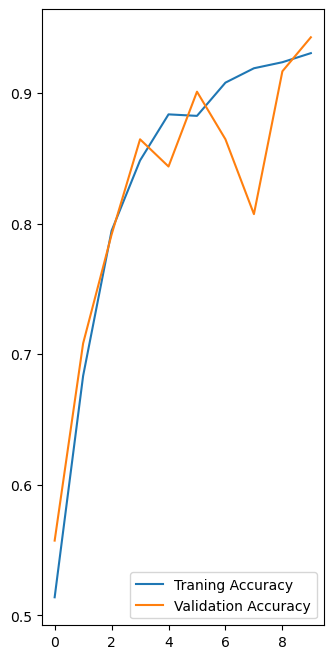

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10), acc , label ='Traning Accuracy')
plt.plot(range(10), val_acc , label = 'Validation Accuracy')
plt.legend(loc='lower right')

In [16]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


2024-04-16 17:31:44.058220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step


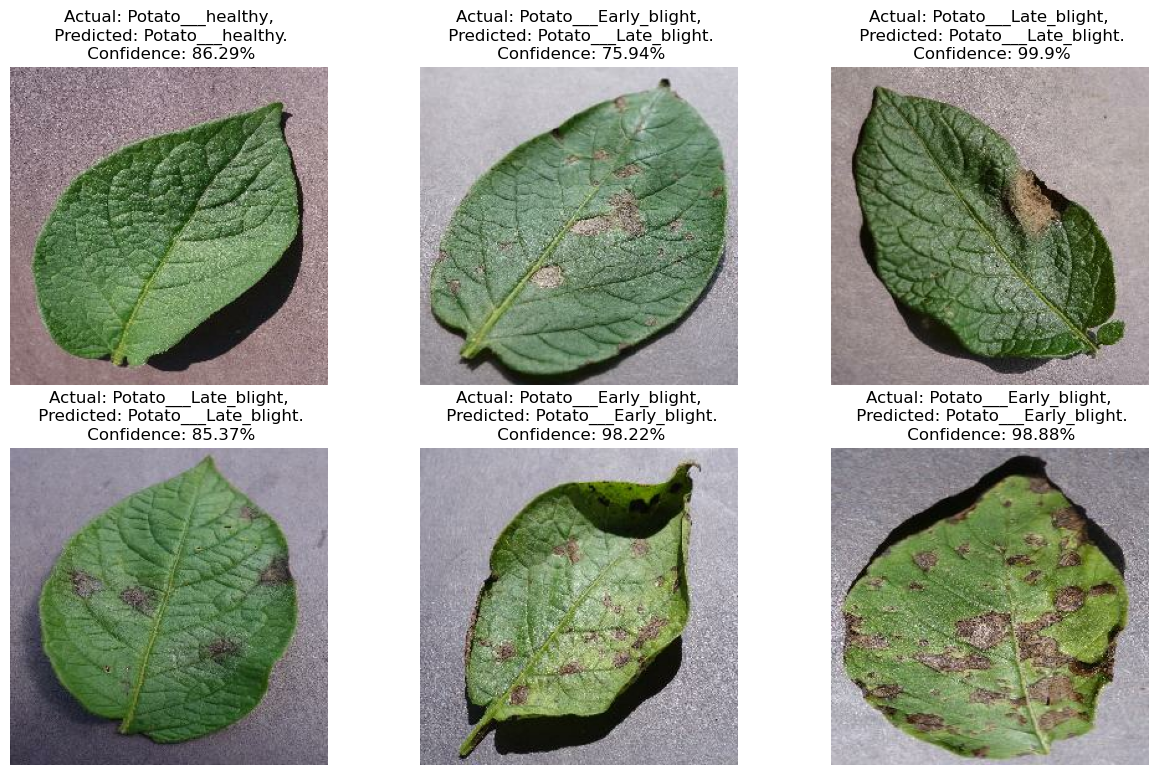

In [17]:
plt.figure(figsize=(15, 14))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())

        actual_class = class_name[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [18]:
model.save('../Models/mod.h5')

/Users/apple/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
